<a href="https://colab.research.google.com/github/bonillahermes/Data_Science_Projects/blob/main/CancerMain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hermes Yate Bonilla
**Data Scientist**
---

**Contact:**
- **Email:** [bonillahermes@gmail.com](mailto:bonillahermes@gmail.com)
- **LinkedIn:** [linkedin.com/in/bonillahermes](https://www.linkedin.com/in/bonillahermes/)
- **GitHub:** [github.com/bonillahermes](https://github.com/bonillahermes)
- **Webpage:** [bonillahermes.com](https://bonillahermes.com/)
---

 # Modelo de Clasificación de Células Cancerosas Utilizando Redes Neuronales: Aplicación en la Detección Precisa de Cáncer Maligno y Benigno.


## Introducción
En el presente ejercicio, se empleó un modelo de aprendizaje automático para abordar la clasificación de células cancerosas en un contexto médico. La base de datos utilizada, denominada "Cancer_Data" (obtenida [aquí](https://www.kaggle.com/datasets/erdemtaha/cancer-data?select=Cancer_Data.csv)), contiene información relevante sobre 560 pacientes, donde cada paciente se describe mediante 30 variables relacionadas con características de las células tumorales. El objetivo principal del modelo es determinar si las células cancerosas son benignas o malignas.

La detección y clasificación precisa del cáncer es de vital importancia en la práctica médica, ya que puede tener un impacto significativo en el diagnóstico temprano y en la toma de decisiones terapéuticas. Por lo tanto, el uso de modelos de aprendizaje automático se ha convertido en una herramienta valiosa para ayudar a los profesionales de la salud a tomar decisiones precisas y proporcionar tratamientos personalizados a los pacientes.

El modelo utilizado en este estudio es un clasificador basado en redes neuronales artificiales, específicamente una red neuronal multicapa. La arquitectura del modelo consta de varias capas ocultas, cada una compuesta por neuronas que procesan las características y relaciones entre las variables de entrada. La salida de la red es una única neurona con función de activación sigmoide, lo que permite la clasificación binaria: cáncer benigno (B) o cáncer maligno (M).

La selección de hiperparámetros óptimos para la red neuronal se realizó mediante un proceso de búsqueda aleatoria utilizando la biblioteca Keras Tuner. Este proceso permitió encontrar la configuración de hiperparámetros que minimizara la pérdida en el conjunto de validación y mejorara el rendimiento general del modelo.

Es fundamental destacar que la calidad de los resultados obtenidos por el modelo está fuertemente influenciada por la calidad y cantidad de datos disponibles en la base de datos. En este caso, se cuenta con una muestra de 560 pacientes, lo que proporciona una cantidad adecuada de individuos para entrenar y evaluar el modelo de manera robusta.

El presente estudio representa un paso importante en la aplicación de modelos de aprendizaje automático en el diagnóstico y clasificación de cáncer. Los resultados obtenidos ofrecen una visión valiosa sobre la capacidad del modelo para distinguir entre células benignas y malignas, lo que podría tener un impacto positivo en la detección temprana y el tratamiento efectivo del cáncer.

**¡Nota!**:

Es importante mencionar que, aunque el modelo muestra un alto rendimiento en la clasificación, la interpretación y validación de los resultados deben realizarse junto con la experiencia de los profesionales de la salud para garantizar la precisión y seguridad en la toma de decisiones clínicas. El modelo puede servir como una herramienta complementaria para ayudar en el proceso de diagnóstico y tratamiento, pero siempre bajo la supervisión y orientación de expertos médicos.

## Instalación e importación de librerías


1. Instalación de librerías:

   En esta parte del código, se realiza la instalación de la librería "keras_tuner". Esto se hace mediante el comando "!pip install keras_tuner", que permite instalar el paquete en el entorno actual.

2. Importación de librerías:

   En esta sección, se importan todas las librerías necesarias para el desarrollo del modelo y la evaluación de resultados. Estas librerías son:
   - `pandas`: Para el manejo de datos en forma de DataFrames.
   - `numpy`: Para operaciones matemáticas y manipulación de arreglos.
   - `tensorflow`: La librería principal para el desarrollo de modelos de aprendizaje automático, en este caso, redes neuronales.
   - `keras`: Una API de alto nivel para construir y entrenar modelos en TensorFlow.
   - `StandardScaler` de `sklearn.preprocessing`: Para escalar las variables antes de alimentar el modelo.
   - `train_test_split` de `sklearn.model_selection`: Para dividir los datos en conjuntos de entrenamiento y prueba.
   - `accuracy_score` y `confusion_matrix` de `sklearn.metrics`: Para evaluar el rendimiento del modelo.
   - `EarlyStopping` de `tensorflow.keras.callbacks`: Para detener el entrenamiento del modelo tempranamente si no se produce mejora en la validación.
   - `roc_curve` y `roc_auc_score` de `sklearn.metrics`: Para calcular la curva ROC y el área bajo la curva (AUC-ROC).
   - `seaborn`: Una librería para la visualización de datos basada en matplotlib.
   - `precision_recall_curve` y `average_precision_score` de `sklearn.metrics`: Para calcular la curva de Precisión-Recall y el promedio de precisión.

3. Importación de keras_tuner:

   En esta parte del código, se importa la librería `keras_tuner` con el alias `kt`. Esta librería permite la búsqueda y selección de hiperparámetros óptimos para el modelo de red neuronal.

In [ ]:
# Instalación de librerías
!pip install keras_tuner

# Importación de librerías
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve, average_precision_score

# Importación de keras_tuner
import keras_tuner as kt


## Carga de la base de datos y visualización.



1. Importamos el ambiente de Google Drive:

   La primera línea del código importa la función `drive` del módulo `google.colab`, que nos permite montar Google Drive en el entorno de Colab. Esto es necesario para acceder a archivos almacenados en Google Drive desde Colab, luego hacemos el montaje con `/content/drive/`.

2. Ruta del archivo de datos:

   El archivo se llama "Cancer_Data.csv" y está ubicado en la carpeta "Bases" de Google Drive.

3. Cargamos la base:

   Utilizamos la función `pd.read_csv()` de pandas para cargar el archivo de datos en un DataFrame llamado "Datos_Cancer". Se especifica que el separador utilizado en el archivo CSV es el punto y coma (";") mediante el parámetro `sep=';'`.

4. Dimensión del DataFrame:

   Las líneas del código con `print("\nDimensiones del DataFrame:")`, `print("Número de Filas:", Datos_Cancer.shape[0])` y `print("Número de Columnas:", Datos_Cancer.shape[1])` muestran la dimensión del DataFrame "Datos_Cancer". La propiedad `shape` del DataFrame devuelve una tupla que contiene el número de filas y columnas, respectivamente.

5. Tipo de variables en el DataFrame:

   Las líneas del código con `print("\nTipos de variables en el DataFrame:")` y `print(Datos_Cancer.dtypes)` muestran los tipos de variables presentes en el DataFrame "Datos_Cancer". La propiedad `dtypes` del DataFrame devuelve una serie que contiene los tipos de datos de cada columna.

In [ ]:
# Montaje de Google Drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Ruta del archivo de datos
file_path = "/content/drive/MyDrive/Bases/Cancer_Data.csv"

# Carga de datos
Datos_Cancer = pd.read_csv(file_path, sep=';')

# Visualización de la dimensión del DataFrame (número de filas y columnas)
print("\nDimensiones del DataFrame:")
print("Número de Filas:", Datos_Cancer.shape[0])
print("Número de Columnas:", Datos_Cancer.shape[1])

# Visualización del tipo de variables en el DataFrame
print("\nTipos de variables en el DataFrame:")
print(Datos_Cancer.dtypes)


Dimensiones del DataFrame:
Número de Filas: 569
Número de Columnas: 32

Tipos de variables en el DataFrame:
id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst      

## Procesamiento de datos

1. Eliminamos la columna del ID del paciente:

   Utilizamos el método `drop()` del DataFrame "Datos_Cancer" para eliminar la columna llamada 'id'. La columna 'id' no se utiliza para el modelo, por lo que se elimina para reducir el número de variables.

2. Convertir la variable objetivo "diagnosis" en 0 (benigno) y 1 (maligno):
   Convertimos la variable objetivo "diagnosis" en una variable binaria para el modelo. En este caso, se considera que 'M' representa cáncer maligno y 'B' representa cáncer benigno. Se utiliza el método `astype(int)` para convertir los valores 'M' en 1 y los valores 'B' en 0.

3. Dividimos los datos en características (X) y etiquetas (y):
   Partimos el DataFrame en dos partes: "X" que contiene las características (variables independientes) y "y" que contiene las etiquetas (variable objetivo).

4. Dividimos los datos en entrenamiento y prueba:
   Usamos la función `train_test_split()` de scikit-learn para dividir los datos en conjuntos de entrenamiento y prueba. El conjunto de prueba se establece en un 30% del total de datos, utilizando el parámetro `test_size=0.3`. El parámetro `random_state=36545808` se utiliza para asegurar la reproducibilidad de la división.

5. Escalamos los datos:
   Empleamos la clase `StandardScaler()` de scikit-learn para escalar las características. El conjunto de entrenamiento se ajusta a la escala utilizando el método `fit_transform()`, y el conjunto de prueba se escala utilizando el método `transform()`. El escalado es importante para asegurar que todas las características tengan una escala similar, lo que ayuda al modelo a converger más rápidamente y a tener un mejor desempeño.

In [ ]:
# Preprocesamiento de datos
# Eliminar columna de ID, ya que no aporta información para el modelo
Datos_Cancer.drop(columns=['id'], inplace=True)

# Convertir la variable objetivo "diagnosis" en 0 (benigno) y 1 (maligno)
Datos_Cancer['diagnosis'] = (Datos_Cancer['diagnosis'] == 'M').astype(int)

# Dividir los datos en características (X) y etiquetas (y)
X = Datos_Cancer.drop(columns=["diagnosis"])
y = Datos_Cancer["diagnosis"]

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=36545808)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



## Creación del Modelo

Definimos una función llamada `build_model(hp)` que se utiliza para crear y compilar un modelo de red neuronal con hiperparámetros ajustables utilizando la biblioteca Keras Tuner:

1. Definición de la función `build_model(hp)`:

   La función llamada `build_model` toma un objeto `hp` como argumento. El objeto `hp` es utilizado por Keras Tuner para definir los hiperparámetros ajustables del modelo.

2. Creación del modelo secuencial:

   Creamos un modelo secuencial utilizando `keras.Sequential()`. Un modelo secuencial es apropiado para una pila lineal de capas, donde cada capa tiene exactamente un tensor de entrada y uno de salida.

3. Añadir la capa de entrada:

   Aquí agregamos una capa de entrada al modelo. La dimensión de entrada de esta capa es igual al número de características en el conjunto de entrenamiento escalado, que se obtiene de `X_train_scaled.shape[1]`.

4. Bucle para agregar capas ocultas:

   Usamos un bucle `for` para agregar capas ocultas al modelo. La variable `i` toma valores desde 0 hasta `num_layers - 1`, donde `num_layers` es un hiperparámetro ajustable definido por Keras Tuner con un mínimo de 1 y un máximo de 5. En cada iteración, se agrega una capa densa (totalmente conectada) al modelo.

5. Capa densa con unidades y función de activación ajustables:

   En cada iteración del bucle, se agrega una capa densa al modelo utilizando `model.add(layers.Dense())`. El número de unidades de la capa (`units`) es un hiperparámetro ajustable con un mínimo de 32 y un máximo de 564, en incrementos de 32. La función de activación (`activation`) también es un hiperparámetro ajustable, con opciones para "relu" (unidad lineal rectificada) definido por Keras Tuner.

6. Capa de dropout opcional:

   Después de agregar la capa densa, hay una verificación condicional para agregar una capa de dropout opcional. El hiperparámetro `dropout` es un booleano definido por Keras Tuner. Si `dropout` es verdadero, se agrega una capa de dropout con una tasa del 25% utilizando `model.add(layers.Dropout())`. El dropout es una técnica de regularización que ayuda a prevenir el sobreajuste del modelo.

7. Capa de salida:

   Después del bucle, agregamos una capa de salida al modelo con una sola unidad y una función de activación sigmoidea (`activation="sigmoid"`) para problemas de clasificación binaria. La salida será un valor entre 0 y 1 que representa la probabilidad de la clase positiva.

8. Compilación del modelo:

   La siguiente sección compila el modelo utilizando `model.compile()`. Se utiliza la función de pérdida `binary_crossentropy` de Keras para problemas de clasificación binaria. El optimizador `Adam` se utiliza para ajustar los pesos del modelo y las métricas de evaluación se definen como `BinaryAccuracy`, `Precision` y `Recall`, que serán utilizadas para evaluar el rendimiento del modelo durante el entrenamiento.

9. Retorno del modelo:
   La función `build_model(hp)` devuelve el modelo creado y compilado.

De esta manera, se obtiene la función de creación de modelo que es utilizada por Keras Tuner para explorar diferentes combinaciones de hiperparámetros y encontrar el mejor modelo que se adapte a los datos del problema de clasificación binaria de cáncer.

In [ ]:
# Definir la función de creación de modelo
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Input(shape=(X_train_scaled.shape[1],)))
    for i in range(hp.Int("num_layers", 1, 5)):
        model.add(layers.Dense(
            units=hp.Int(f"units_{i}", min_value=32, max_value=564, step=32),
            activation=hp.Choice("activation", ["relu"])
        ))
        if hp.Boolean("dropout"):
            model.add(layers.Dropout(rate=0.25))
    model.add(layers.Dense(1, activation="sigmoid"))
    model.compile(
        loss=tf.keras.losses.binary_crossentropy,
        optimizer=keras.optimizers.Adam(),
        metrics=[
            tf.keras.metrics.BinaryAccuracy(name='accuracy'),
            tf.keras.metrics.Precision(name='precision'),
            tf.keras.metrics.Recall(name='recall')
        ]
    )
    return model


## Búsqueda de hiperparámetros

Esta sección del código utiliza Keras Tuner para buscar y encontrar la mejor combinación de hiperparámetros para el modelo de red neuronal utilizando el método de búsqueda aleatoria:

1. Creación del objeto `tuner`:

   Creamos un objeto `tuner` utilizando `kt.RandomSearch()`. Este objeto es responsable de realizar la búsqueda de hiperparámetros y encontrar la combinación óptima de hiperparámetros para el modelo. El algoritmo de búsqueda utilizado es la búsqueda aleatoria (`RandomSearch`).

2. Argumentos del objeto `tuner`:

   - `build_model`: Es la función que definimos previamente para crear y compilar el modelo con hiperparámetros ajustables.
   - `objective`: Se define como "val_loss", lo que indica que el objetivo de la búsqueda de hiperparámetros es minimizar la pérdida en el conjunto de validación (validación cruzada).
   - `max_trials`: Especifica el número máximo de combinaciones de hiperparámetros que se probarán durante la búsqueda. En este caso, se probarán hasta 10 combinaciones.
   - `directory` y `project_name`: Estos argumentos definen la ubicación donde se guardarán los resultados de la búsqueda de hiperparámetros.

3. Definición de Early Stopping:

   Definimos un objeto de `EarlyStopping` para detener la búsqueda de hiperparámetros tempranamente si no se observa una mejora significativa en la pérdida del conjunto de validación después de cierto número de épocas. El parámetro `monitor='val_loss'` indica que se debe monitorear la pérdida en el conjunto de validación.

4. Ejecución de la búsqueda de hiperparámetros:

   Se inicia la búsqueda de hiperparámetros utilizando el método `search()` del objeto `tuner`. Los argumentos que se pasan a este método son los siguientes:
   - `X_train_scaled` y `y_train`: Los datos de entrenamiento escalados y sus etiquetas correspondientes.
   - `epochs`: El número de épocas que se utilizarán para entrenar cada combinación de hiperparámetros.
   - `validation_split`: La proporción del conjunto de entrenamiento que se utilizará como conjunto de validación durante el entrenamiento del modelo. En este caso, se utiliza el 20% del conjunto de entrenamiento como validación cruzada.
   - `callbacks`: Se pasa el objeto `stop_early` como callback para aplicar el Early Stopping.

5. Obtención de los mejores hiperparámetros:

   Después de que finaliza la búsqueda de hiperparámetros, se obtienen los mejores hiperparámetros utilizando el método `get_best_hyperparameters(num_trials=1)[0]` del objeto `tuner`. En este caso, se obtiene solo el mejor conjunto de hiperparámetros, ya que `num_trials=1`.


In [ ]:
# Búsqueda de hiperparámetros
tuner = kt.RandomSearch(
    build_model,
    objective="val_loss",
    max_trials=10,
    directory="/content/drive/MyDrive/Tuning_Cancer",
    project_name="modelo_cancer"
)

stop_early = EarlyStopping(monitor='val_loss', patience=5)

tuner.search(X_train_scaled, y_train, epochs=50, validation_split=0.2, callbacks=[stop_early])

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

Trial 10 Complete [00h 00m 03s]
val_loss: 0.07886013388633728

Best val_loss So Far: 0.07169654220342636
Total elapsed time: 00h 00m 55s


El resultado muestra la progresión de los intentos de entrenamiento y los valores de pérdida asociados. El objetivo es encontrar el mejor conjunto de hiperparámetros que produzca el menor valor de pérdida (mejor rendimiento) en el conjunto de validación. A medida que la búsqueda de hiperparámetros continúa, el modelo se ajusta y se acerca a una configuración óptima que debería dar un mejor rendimiento en la tarea de clasificación de cáncer. Un valor de pérdida más bajo es mejor, ya que indica que el modelo se ajusta mejor a los datos de validación. En este caso el valor es 0.0789

## Entrenamiento del Modelo

En esta sección se entrena el modelo con los mejores hiperparámetros encontrados durante la búsqueda y luego evalúa el rendimiento del modelo en el conjunto de prueba para obtener métricas como la pérdida, precisión, exactitud y otras métricas de interés:

1. Creación del modelo con los mejores hiperparámetros:

   Creamos el modelo utilizando los mejores hiperparámetros encontrados en la búsqueda. Para hacer esto, se utiliza el método `tuner.hypermodel.build(best_hps)`. El objeto `tuner` contiene la información sobre el modelo y los mejores hiperparámetros, y el método `build()` crea el modelo con los hiperparámetros óptimos.

2. Entrenamiento del modelo:

   Entrenamos el modelo utilizando el método `fit()` en el conjunto de entrenamiento escalado (`X_train_scaled` e `y_train`). Se especifica el número de épocas (`epochs`) que el modelo se entrenará en los datos de entrenamiento.

3. Validación cruzada durante el entrenamiento:

   Durante el entrenamiento, se utiliza una validación cruzada utilizando el conjunto de validación para monitorear el rendimiento del modelo en datos no vistos durante el entrenamiento. Esto se logra con el argumento `validation_split=0.2` en el método `fit()`, lo que indica que el 20% del conjunto de entrenamiento se utilizará como conjunto de validación.

4. Resultados del entrenamiento:

   Después de completar el entrenamiento, la función `fit()` devuelve un objeto `history`, que contiene información sobre la evolución de las métricas durante el entrenamiento, como la pérdida y las métricas de rendimiento en el conjunto de entrenamiento y validación.

5. Evaluación del modelo en el conjunto de prueba:

   Una vez que el modelo ha sido entrenado, se evalúa su rendimiento en el conjunto de prueba escalado (`X_test_scaled` e `y_test`). Esto se realiza utilizando el método `evaluate()` del modelo, que calcula la pérdida y las métricas de rendimiento en el conjunto de prueba. El resultado de la evaluación se almacena en la variable `eval_result`.


In [ ]:
# Entrenar el modelo con los mejores hiperparámetros
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train_scaled, y_train, epochs=50, validation_split=0.2)

# Evaluar el modelo
eval_result = model.evaluate(X_test_scaled, y_test)

In [ ]:
# Precisión en los datos de prueba
accuracy = eval_result[1]
print('Precisión en los datos de prueba:', accuracy)

Precisión en los datos de prueba: 0.988304078578949


El resultado es 0.9883. Esto significa que el modelo alcanzó una precisión del 98.83% en los datos de prueba. Esto indica que el modelo clasifica correctamente tal porcentaje de las muestras en el conjunto de prueba.

La precisión es una métrica de rendimiento importante en tareas de clasificación, especialmente cuando las clases están equilibradas. Representa la proporción de muestras correctamente clasificadas (verdaderos positivos más verdaderos negativos) sobre el total de muestras en el conjunto de prueba.

Un alto valor de precisión es un buen indicador de que el modelo está funcionando bien en la tarea de clasificación de cáncer, y que tiene una alta capacidad para discriminar entre casos de cáncer benigno y maligno.

## Validaciones

#### 1. Matriz de Confusión

6/6 [==============================] - 0s 3ms/step


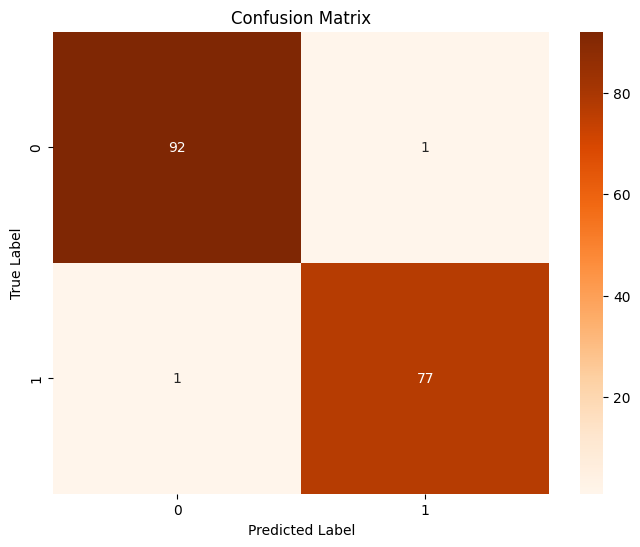

In [ ]:
# Obtener las predicciones del modelo para los datos de prueba
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.where(y_pred > 0.5, 1, 0)

# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_pred_classes)

# Crear un mapa de calor de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


De la matriz de confusión tenemos los siguientes resultados:

* Verdaderos positivos (TP): Hay 77 pacientes con cáncer maligno (Maligno, clase 1) que fueron correctamente identificados como malignos por el modelo.
* Verdaderos negativos (TN): Hay 92 pacientes con cáncer benigno (Benigno, clase 0) que fueron correctamente identificados como benignos por el modelo.
* Falsos positivos (FP): Hay 1 paciente con cáncer benigno que fue incorrectamente clasificado como maligno por el modelo.
* Falsos negativos (FN): Hay 1 paciente con cáncer maligno que fue incorrectamente clasificado como benigno por el modelo.

El modelo tiene un alto número de verdaderos positivos (correctamente clasificados como malignos) y verdaderos negativos (correctamente clasificados como benignos), lo que indica un buen rendimiento en la clasificación. El número de falsos positivos y falsos negativos es muy bajo, lo que también es un buen indicador de que el modelo está realizando una clasificación precisa.

La matriz de confusión muestra que el modelo es efectivo en la clasificación de pacientes con cáncer benigno y maligno, y ha logrado una precisión y rendimiento generalmente altos en la tarea de clasificación de cáncer.

#### 2. Curva ROC

6/6 [==============================] - 0s 2ms/step


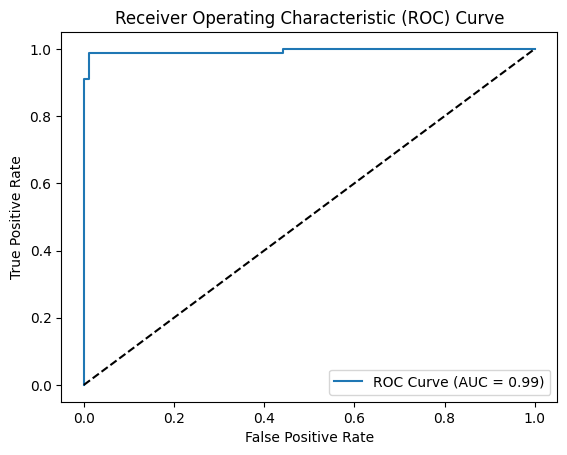

In [ ]:
# Obtener las probabilidades de predicción positiva
y_pred_prob = model.predict(X_test_scaled)

# Calcular la tasa de verdaderos positivos y la tasa de falsos positivos
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calcular el área bajo la curva ROC
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Graficar la curva ROC
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


En una curva ROC, el eje 'x' representa la tasa de falsos positivos (FPR) y el eje 'y' representa la tasa de verdaderos positivos (TPR) o sensibilidad. Una curva ROC ideal se acerca a la esquina superior izquierda del gráfico, lo que indica una alta sensibilidad y una baja tasa de falsos positivos.

Dado que el modelo tiene una alta precisión y un bajo número de falsos positivos y falsos negativos, esta curva ROC esté muy cerca del punto (0,1) en el gráfico, indicando una alta sensibilidad y una baja tasa de falsos positivos. Esto sugiere que el modelo es capaz de discriminar eficazmente entre casos de cáncer benigno y maligno y tiene un buen rendimiento en la tarea de clasificación.

#### 3. Tasa de Precisión y Sensibilidad

6/6 [==============================] - 0s 2ms/step


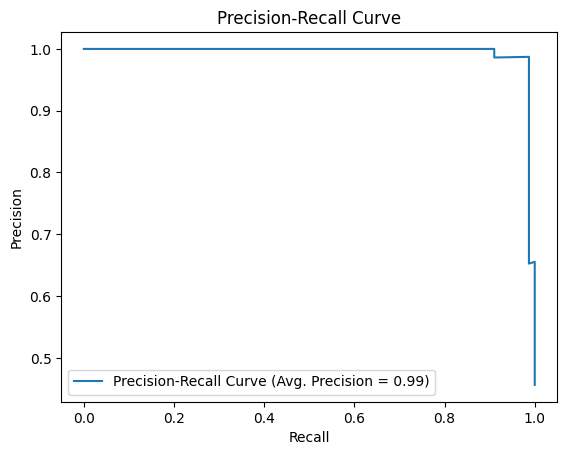

In [ ]:
# Obtener las probabilidades de predicción positiva
y_pred_prob = model.predict(X_test_scaled)

# Calcular la precisión y la sensibilidad a diferentes umbrales
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Calcular el promedio de precisión (average precision score)
average_precision = average_precision_score(y_test, y_pred_prob)

# Graficar la curva de precisión-recall
plt.plot(recall, precision, label=f'Precision-Recall Curve (Avg. Precision = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()


La gráfica de Precisión-Recall (PR) se construye utilizando la precisión en el eje 'y' y la sensibilidad (recall) en el eje 'x'. La sensibilidad se refiere a la tasa de verdaderos positivos (TPR) y es igual a TP / (TP + FN), mientras que la precisión es igual a TP / (TP + FP).

La precisión promedio es de 0.99 y la matriz de confusión muestra un alto número de verdaderos positivos y verdaderos negativos, así la curva se acerca a la parte derecha superior. Esto indica que el modelo tiene una alta precisión (baja tasa de falsos positivos) y una alta sensibilidad (baja tasa de falsos negativos), es decir, puede clasificar correctamente la mayoría de los casos positivos (cáncer maligno) con muy pocos falsos positivos y falsos negativos.

#### 4. Métricas de entrenamiento

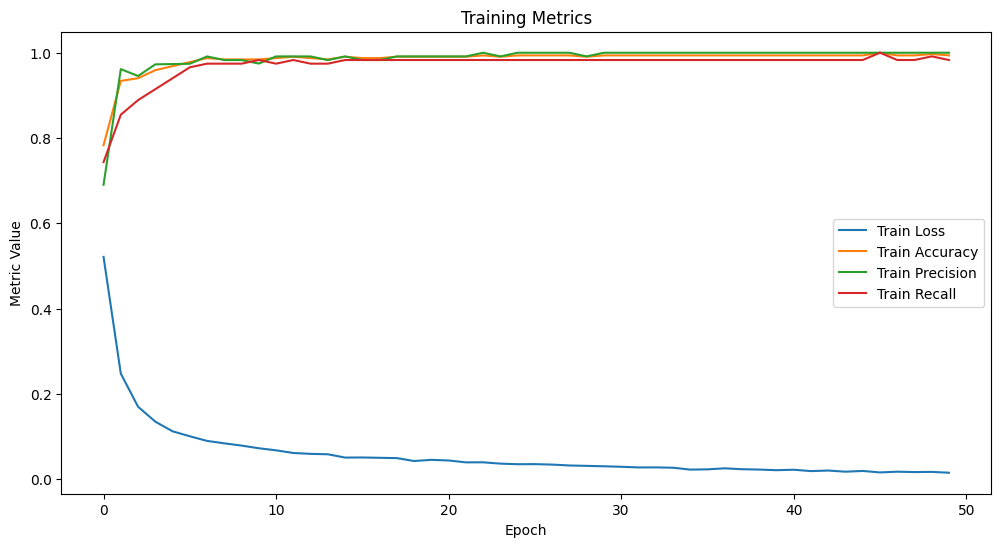

In [ ]:
# Obtener las métricas de entrenamiento del historial
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
train_precision = history.history['precision']
train_recall = history.history['recall']

# Crear un gráfico de líneas para cada métrica de entrenamiento
plt.figure(figsize=(12, 6))
plt.plot(train_loss, label='Train Loss')
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(train_precision, label='Train Precision')
plt.plot(train_recall, label='Train Recall')
plt.xlabel('Epoch')
plt.ylabel('Metric Value')
plt.title('Training Metrics')
plt.legend()
plt.show()


En general, vemos que el gráfico de historias de entrenamiento muestra lo siguiente:

* Loss (pérdida): el valor de la pérdida disminuye (tiende a 0) a medida que aumentan las épocas de entrenamiento. Esto indica que el modelo está aprendiendo a ajustar sus parámetros para minimizar la diferencia entre las predicciones y las etiquetas reales en el conjunto de entrenamiento.

* Accuracy (precisión): el valor de la precisión aumenta a medida que aumentan las épocas de entrenamiento. Esto indica que el modelo está mejorando su capacidad para clasificar correctamente las muestras en el conjunto de entrenamiento.

* Precision (precisión): la precisión promedio es de 0.99, el gráfico  muestra una tendencia ascendente para la precisión. Esto indica que el modelo está mejorando su capacidad para predecir correctamente los casos positivos (cáncer maligno) con una baja tasa de falsos positivos.

* Recall (sensibilidad): Dado que el recall también es una métrica importante en el contexto del cáncer, el gráfico muestra una tendencia ascendente para el recall. Esto indica que el modelo está mejorando su capacidad para identificar correctamente los casos positivos (cáncer maligno) con una baja tasa de falsos negativos.






